In [1]:
import xarray as xr
import numpy as np
import geopandas as gpd
from earthkit.climate import shapes
import matplotlib.pyplot as plt

In [2]:
dataset = xr.open_dataset(
    "test_data/era5_temperature_europe_2015.grib", chunks={'time': 48}
)
dataarray = dataset.t2m
geodataframe = gpd.read_file(
    "test_data/nuts/NUTS_RG_60M_2021_4326_LEVL_0.geojson"
)

In [3]:
dataarray

<xarray.DataArray 't2m' (time: 1460, latitude: 201, longitude: 281)>
dask.array<open_dataset-a0187d44e2d6c887a72beb5e73832c61t2m, shape=(1460, 201, 281), dtype=float32, chunksize=(48, 201, 281), chunktype=numpy.ndarray>
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude   (longitude) float64 -10.0 -9.75 -9.5 -9.25 ... 59.5 59.75 60.0
    valid_time  (time) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      56481
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

In [4]:
geodataframe.iloc[:5]

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,DK,DK,0,DK,Danmark,Danmark,0,0,0,DK,"MULTIPOLYGON (((15.16290 55.09370, 15.09400 54..."
1,RS,RS,0,RS,Serbia,Srbija/Сpбија,0,0,0,RS,"POLYGON ((21.47920 45.19300, 21.35850 44.82160..."
2,EE,EE,0,EE,Eesti,Eesti,0,0,0,EE,"MULTIPOLYGON (((27.35700 58.78710, 27.64490 57..."
3,EL,EL,0,EL,Elláda,Ελλάδα,0,0,0,EL,"MULTIPOLYGON (((28.07770 36.11820, 27.86060 35..."
4,ES,ES,0,ES,España,España,0,0,0,ES,"MULTIPOLYGON (((4.39100 39.86170, 4.19070 39.7..."


Text(0.5, 1.0, 'Masked Germany Zoom')

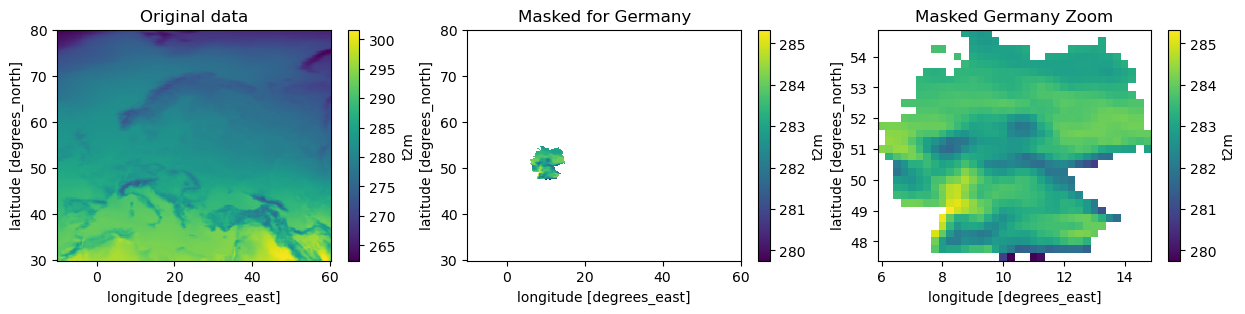

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
masked_data = shapes.masks(dataarray, geodataframe)
dataarray.mean(dim='time').plot(ax=axes[0])
axes[0].set_title('Original data')
masked_data.sel(FID='DE').mean(dim='time').plot(ax=axes[1])
axes[1].set_title('Masked for Germany')
germany_data = masked_data.sel(FID='DE').dropna(dim='latitude', how='all').dropna(dim='longitude', how='all')
germany_data.mean(dim='time').plot(ax=axes[2])
axes[2].set_title('Masked Germany Zoom')

In [6]:
reduced_data = shapes.reduce(dataarray, geodataframe, how=np.nanmax)
reduced_data.iloc[:5]

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,t2m_nanmax
0,DK,DK,0,DK,Danmark,Danmark,0,0,0,DK,"MULTIPOLYGON (((15.16290 55.09370, 15.09400 54...","[<xarray.DataArray 't2m' ()>\narray(279.88135,..."
1,RS,RS,0,RS,Serbia,Srbija/Сpбија,0,0,0,RS,"POLYGON ((21.47920 45.19300, 21.35850 44.82160...","[<xarray.DataArray 't2m' ()>\narray(264.86768,..."
2,EE,EE,0,EE,Eesti,Eesti,0,0,0,EE,"MULTIPOLYGON (((27.35700 58.78710, 27.64490 57...","[<xarray.DataArray 't2m' ()>\narray(277.11377,..."
3,EL,EL,0,EL,Elláda,Ελλάδα,0,0,0,EL,"MULTIPOLYGON (((28.07770 36.11820, 27.86060 35...","[<xarray.DataArray 't2m' ()>\narray(287.45166,..."
4,ES,ES,0,ES,España,España,0,0,0,ES,"MULTIPOLYGON (((4.39100 39.86170, 4.19070 39.7...","[<xarray.DataArray 't2m' ()>\narray(284.90283,..."


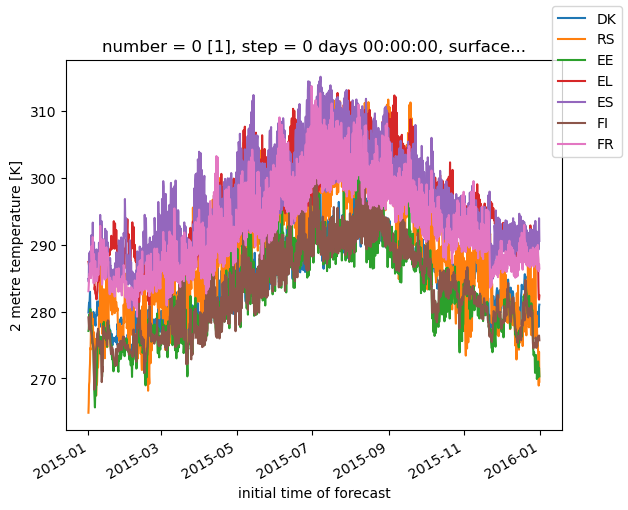

In [7]:
fig, ax = plt.subplots(1)
for i, feature in reduced_data.iterrows():
    feature['t2m_nanmax'].plot(ax=ax, label=feature['FID'])
    if i>5:
        break
fig.legend()

In [8]:
reduced_data_xr = shapes.reduce(dataarray, geodataframe, how=np.nanmax, return_as='xarray')
reduced_data_xr

<xarray.DataArray 't2m' (FID: 37, time: 1460)>
array([[279.88135, 280.61102, 281.33185, ..., 277.7212 , 280.78748,
        281.04398],
       [264.86768, 266.3454 , 269.08966, ..., 268.93408, 273.9906 ,
        269.51077],
       [277.11377, 277.34735, 277.97247, ..., 271.02783, 271.52966,
        270.31937],
       ...,
       [274.09814, 275.03876, 276.59552, ..., 269.32666, 273.7621 ,
        271.876  ],
       [280.16846, 279.87665, 278.94513, ..., 281.21338, 283.03357,
        282.04788],
       [281.73486, 282.1579 , 281.6502 , ..., 281.2251 , 280.1527 ,
        280.6592 ]], dtype=float32)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
  * FID         (FID) object 'DK' 'RS' 'EE' 'EL' 'ES' ... 'CY' 'CZ' 'DE' 'NO'
    geometry    (FID) object MULTIPOLYGON (((15.1629 55.0937, 15.094 54.9962,...
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      56481
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

In [9]:
try:
    reduced_data_xr.to_netcdf('test.nc') # , engine="h5netcdf", invalid_netcdf=True)
except ValueError as err:
    print('Unable to save xarray as netcdf')


Unable to save xarray as netcdf


/Users/edwardcomyn-platt/miniconda3/envs/earthkit/lib/python3.10/site-packages/h5netcdf/core.py:1199: UserWarning: You are writing invalid netcdf features to file `/Users/edwardcomyn-platt/Work/Git_Repositories/EARTHKIT/earthkit-climate/notebooks/test.nc`. The file will thus be not conforming to NetCDF-4 standard and might not be readable by other netcdf tools. Consider using a different extension.
  self.flush()


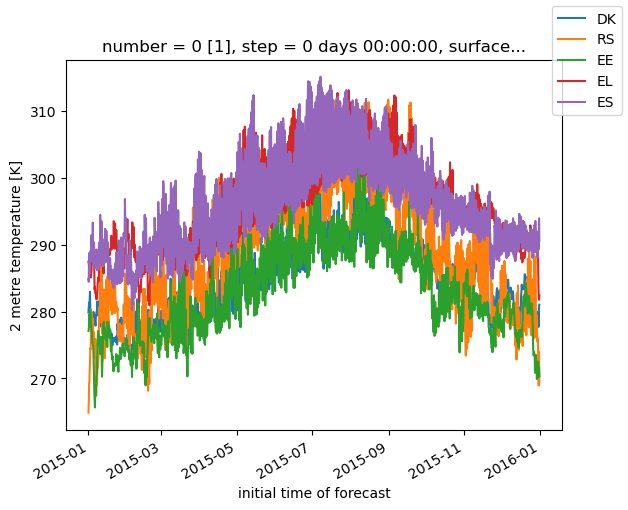

In [10]:
fig, ax = plt.subplots(1)
for fid in geodataframe.NUTS_ID[:5]:
    reduced_data_xr.sel(FID=fid).plot(ax=ax, label=fid)
fig.legend()
